In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def load_data(filename:str):
    return pd.read_csv(filename+".csv")
dataset = load_data("V7")

In [93]:
dataset.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

- Gender: Пол человека (Male или Female).
- Age: Возраст человека в годах.
- Height: Рост человека в метрах.
- Weight: Вес человека в килограммах.
- family_history_with_overweight: Наличие семейной предрасположенности к избыточному весу (yes или no).
- FAVC (Frequent Availability of Caloric Food): Частое употребление калорийной пищи (yes или no).
- FCVC (Frequency of Consumption of Vegetables): Частота употребления овощей.
- NCP (Number of Main Meals per Day): Количество основных приемов пищи в день.
- CAEC (Consumption of Food between Meals): Частота употребления пищи между основными приемами
- SMOKE: Курение (yes или no).
- CH2O (Daily Water Consumption): Среднее количество потребляемой воды в литрах за день.
- SCC (Calories Consumption Monitoring): Контроль потребления калорий (yes или no).
- FAF (Physical Activity Frequency): Частота физической активности.
- TUE (Time Using Technology Devices): Среднее время использования электронных устройств (компьютеров, телефонов) в часах в день.
- CALC (Alcohol Consumption): Частота потребления алкоголя (no, Sometimes, Frequently, Always).
- MTRANS (Transportation Mode): Основной вид транспорта, используемый для передвижения
- NObeyesdad: Уровень ожирения (целевая переменная).

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [95]:
dataset['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

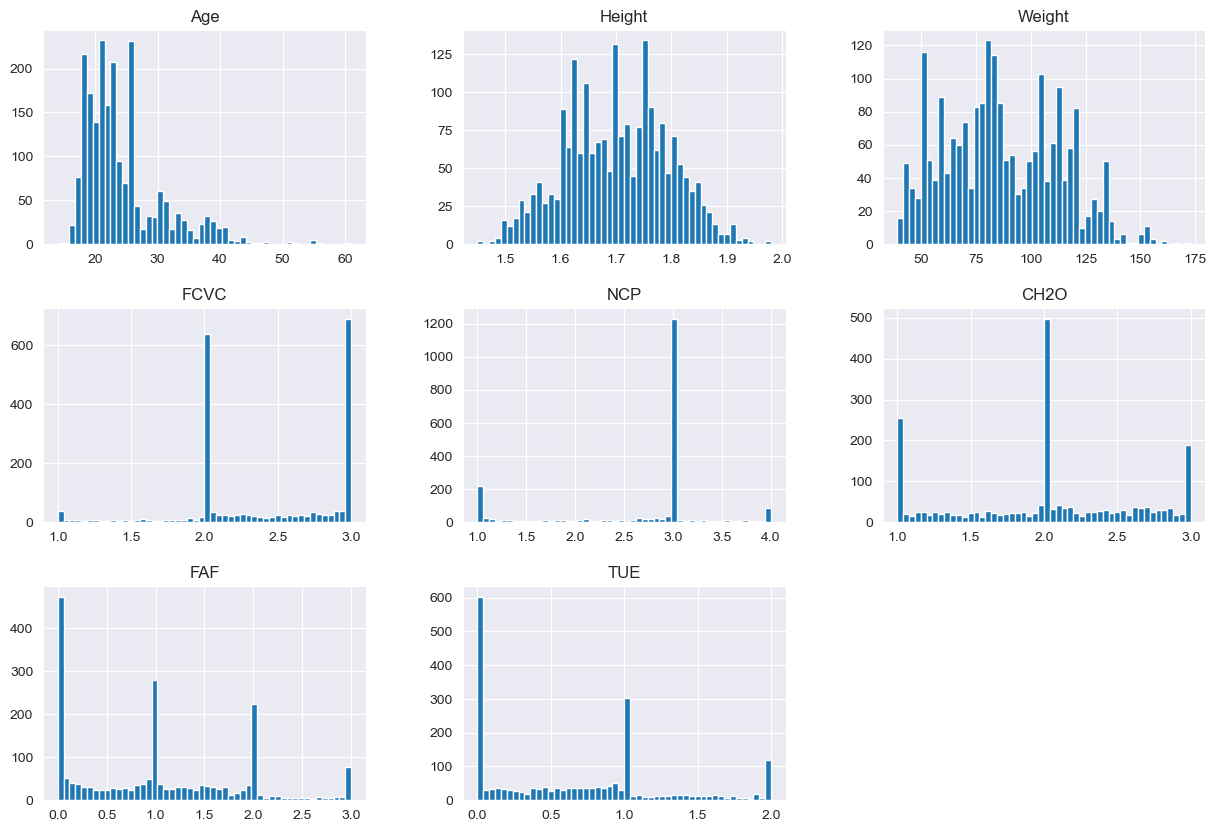

In [96]:
# Гистограммы для числовых признаков
dataset.hist(bins=50,figsize=(15, 10))
plt.show()

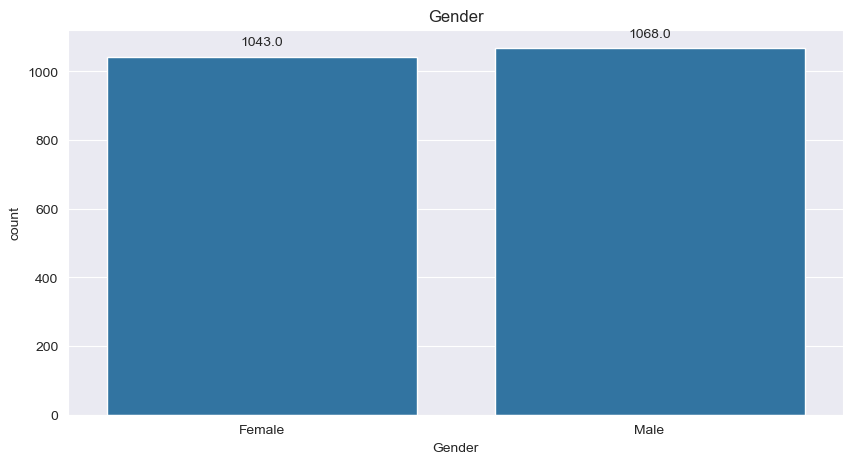

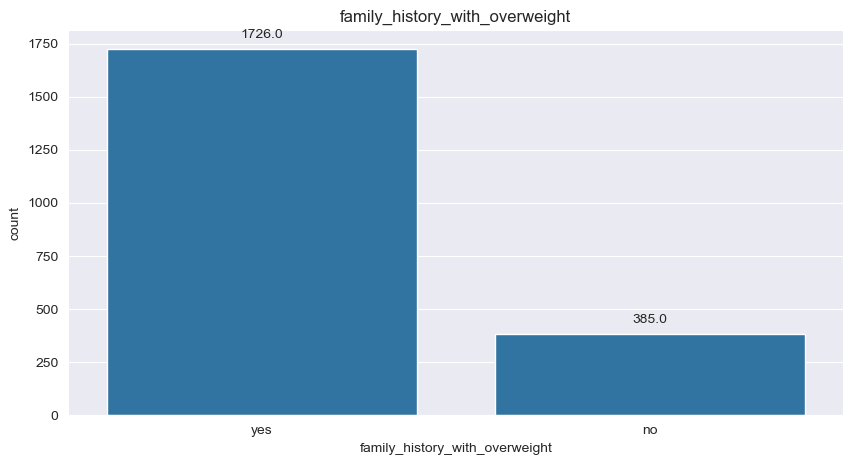

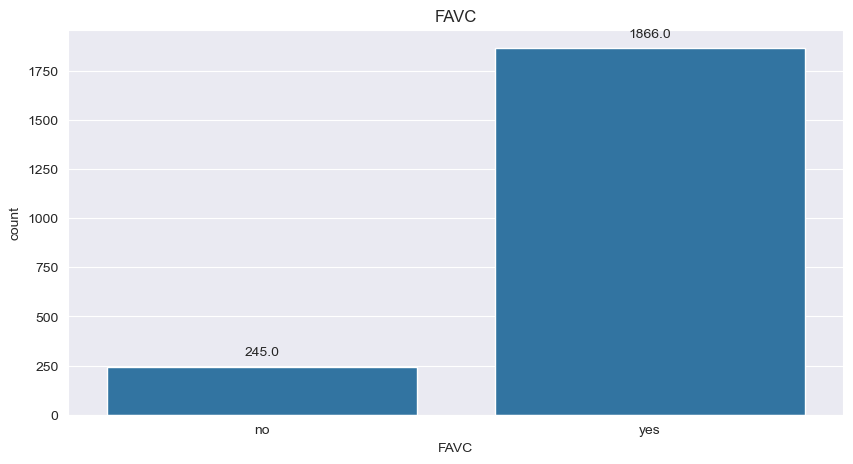

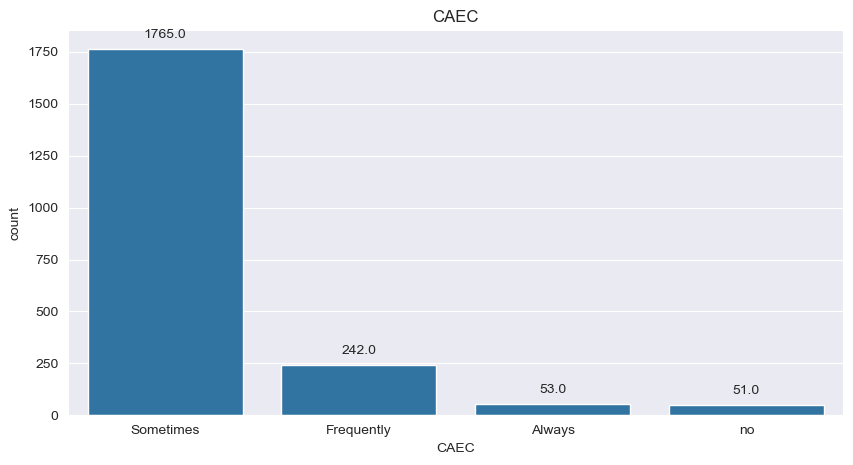

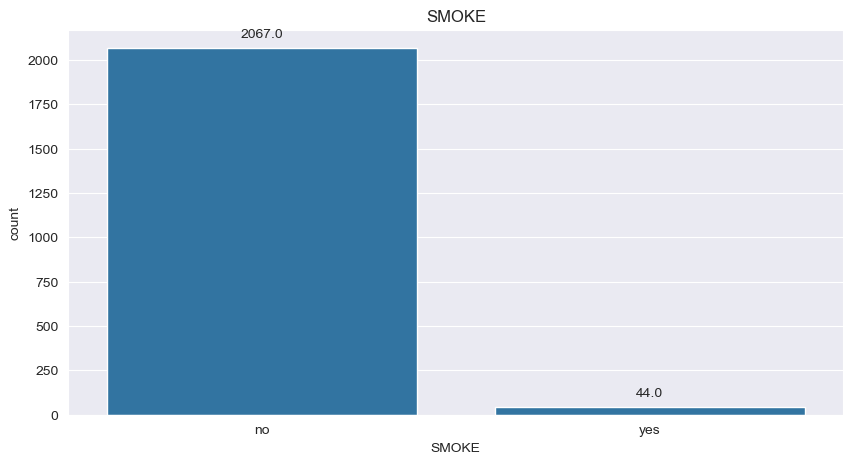

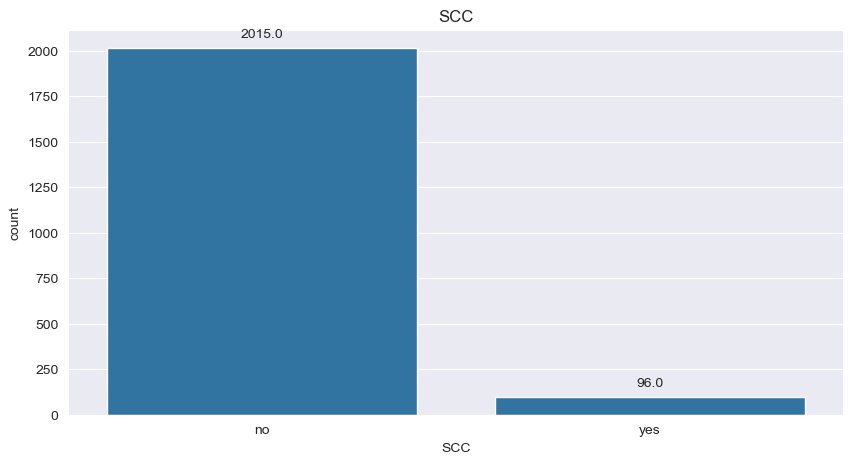

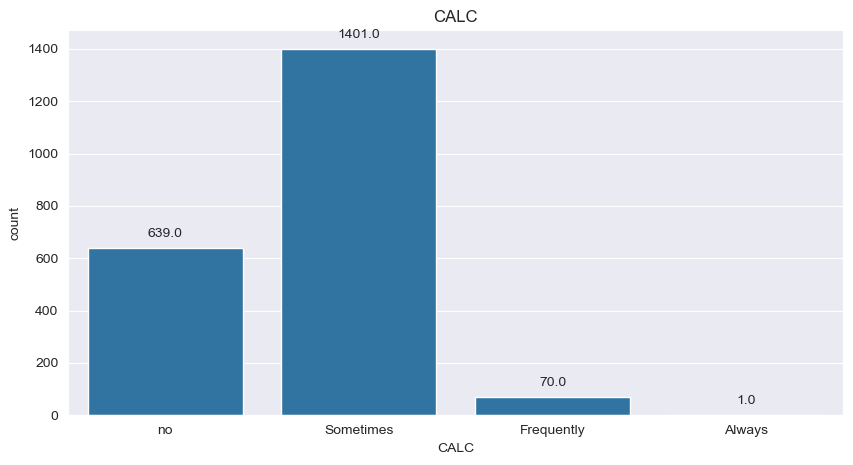

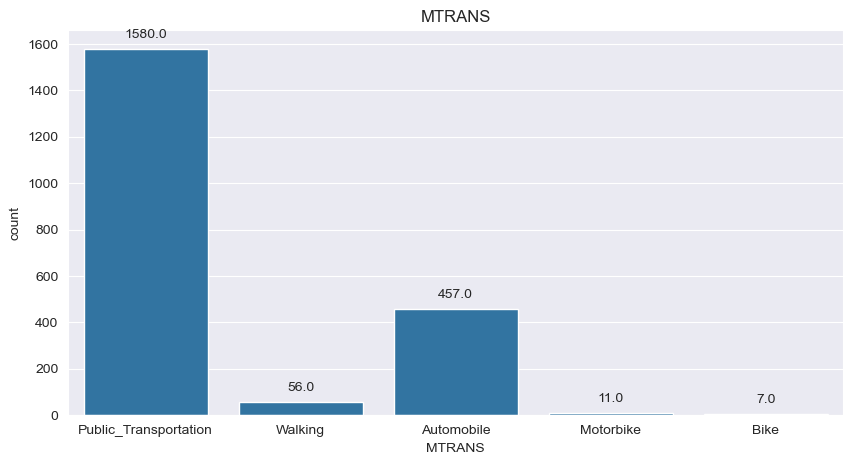

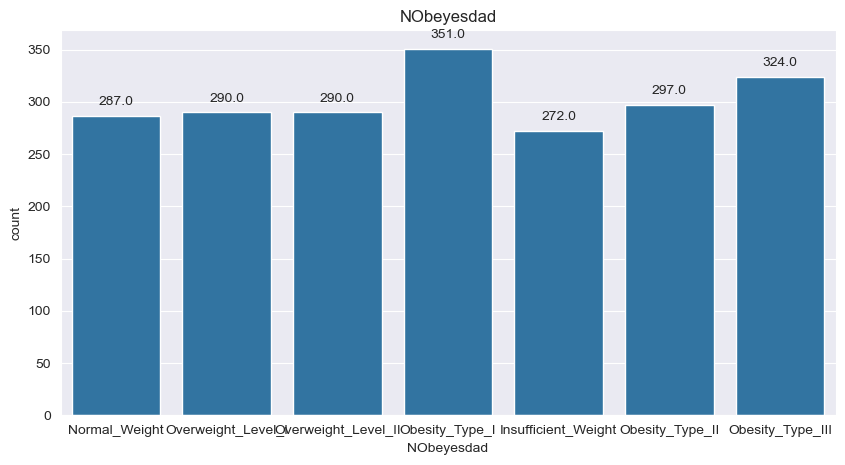

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))  # Устанавливаем размер графика
    ax = sns.countplot(data=dataset, x=feature)  # Столбчатая диаграмма

    # Добавляем аннотации (количество записей) над каждым столбцом
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'{feature}')
    plt.show()

KeyboardInterrupt: 

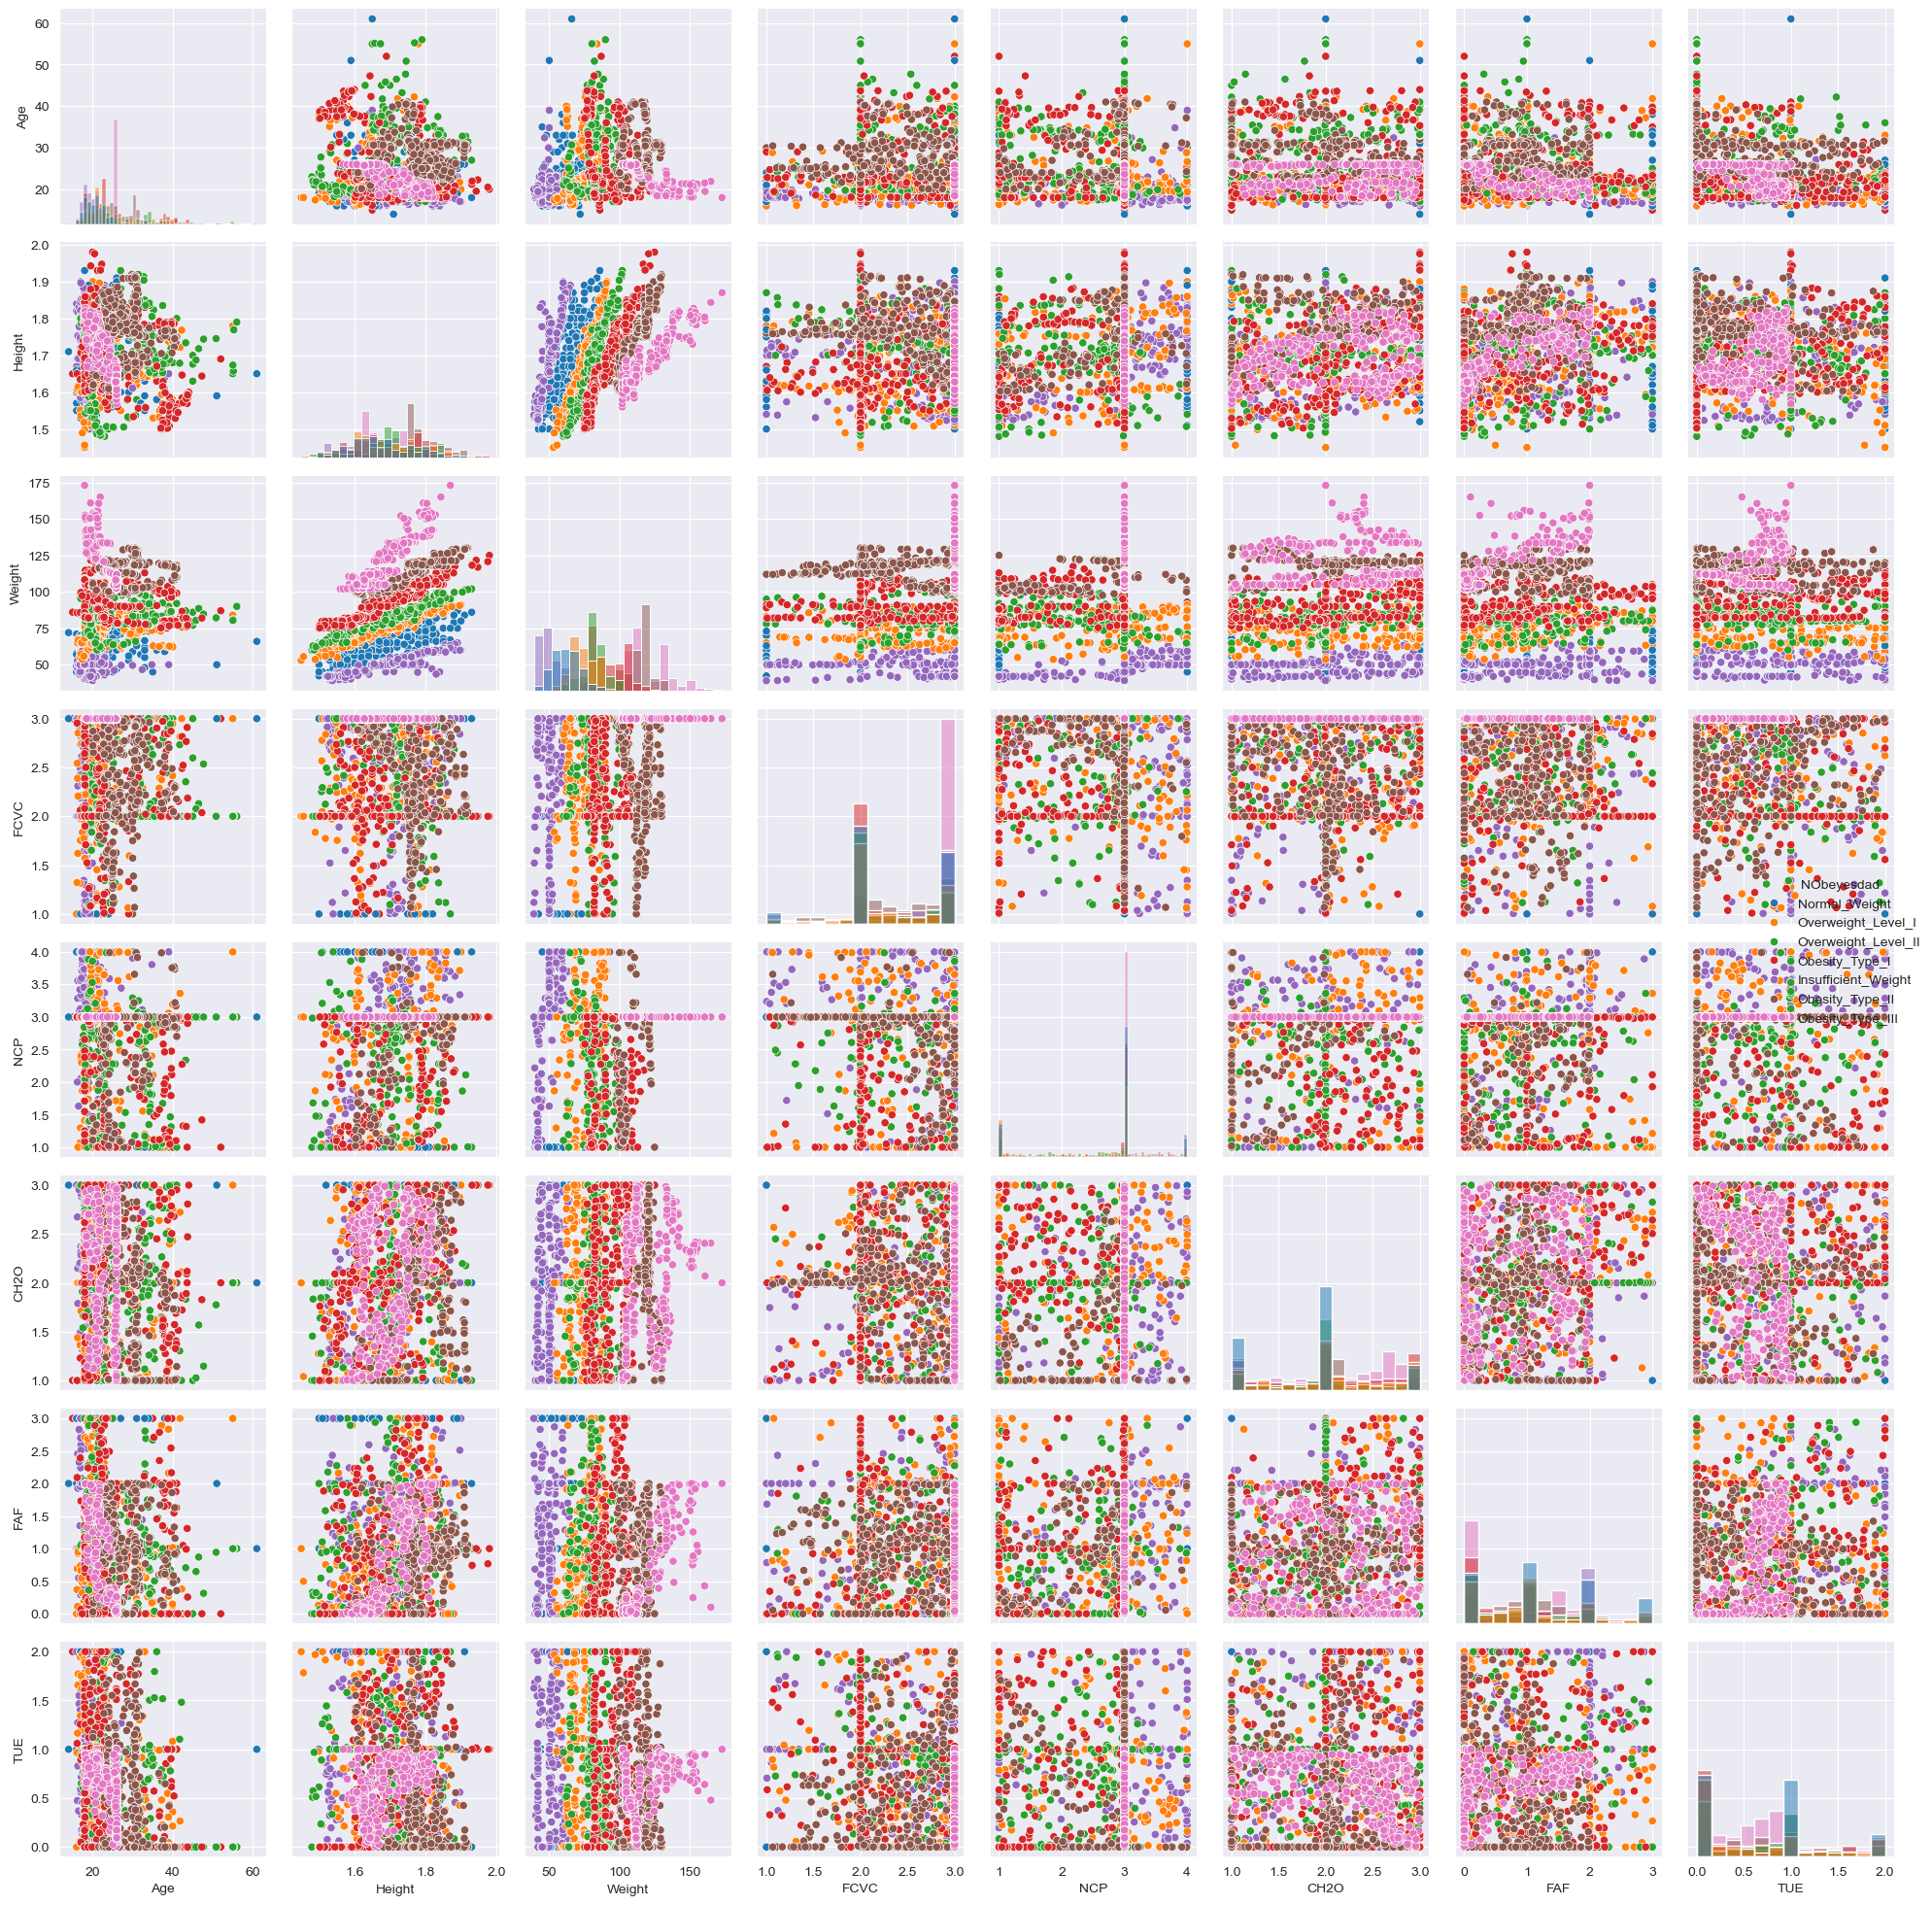

In [98]:
# Попарные графики
sns.pairplot(dataset, hue="NObeyesdad", diag_kind="hist")
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
dataset['Gender'] = encoder.fit_transform(dataset[['Gender']])
dataset['family_history_with_overweight'] = encoder.fit_transform(dataset[['family_history_with_overweight']])
dataset['FAVC'] = encoder.fit_transform(dataset[['FAVC']])
dataset['SMOKE'] = encoder.fit_transform(dataset[['SMOKE']])
dataset['SCC'] = encoder.fit_transform(dataset[['SCC']])
dataset['CAEC'] = encoder.fit_transform(dataset[['CAEC']])
dataset['CALC'] = encoder.fit_transform(dataset[['CALC']])
dataset['MTRANS'] = encoder.fit_transform(dataset[['MTRANS']])
dataset['NObeyesdad'] = encoder.fit_transform(dataset[['NObeyesdad']])

In [ ]:
dataset

In [ ]:
corr_matrix  = dataset.corr()
corr_matrix

In [ ]:
y_column_name = "NObeyesdad"
corr_matrix[y_column_name].sort_values(ascending = False, key=abs)

In [ ]:
# Попарные графики
sns.pairplot(dataset, hue="NObeyesdad", diag_kind="hist")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

def calc_best_features(ds):
    X = ds.drop(y_column_name, axis=1)
    y = ds[y_column_name]
    selector = SelectKBest(score_func=f_classif, k=10)
    
    fit = selector.fit(X,y)
    dfscores = pd.DataFrame({"fit":fit.scores_})
    dfcolumns = pd.DataFrame({"title":X.columns})
    fscores = pd.concat([dfcolumns,dfscores],axis=1)
    return fscores.sort_values(ascending = False,by = "fit")

calc_best_features(dataset)

In [ ]:
dataset_clean = dataset.copy(deep=True)

# Индекс массы тела
dataset_clean['BMI'] = dataset_clean['Weight'] / (dataset_clean['Height'] ** 2)
dataset_clean['W2FCVC'] = dataset_clean['Weight'] / (dataset_clean['FCVC'])
dataset_clean['W2NCP'] = dataset_clean['Weight'] / (dataset_clean['NCP'])
dataset_clean['W2CH2O'] = dataset_clean['Weight'] / (dataset_clean['CH2O'])
dataset_clean['FAF2W'] = dataset_clean['FAF'] / (dataset_clean['Weight'])
dataset_clean['TUE2W'] = dataset_clean['TUE'] / (dataset_clean['Weight'])
dataset_clean['FHO2FCVC'] = dataset_clean['family_history_with_overweight'] / (dataset_clean['FCVC'])
dataset_clean['CALC2FCVC'] = dataset_clean['CALC'] / (dataset_clean['FCVC'])
dataset_clean['SCC2CH2O'] = dataset_clean['SCC'] / (dataset_clean['CH2O'])


corr_clean  = dataset_clean.corr()[y_column_name]
corr_clean.sort_values(ascending = False, key=abs)

In [ ]:
dataset_clean.describe()

In [ ]:
calc_best_features(dataset_clean)

In [ ]:
delete = ['SMOKE', 'TUE', 'CH2O', 'FAVC','Height','CALC','MTRANS','NCP','SCC','SCC2CH2O','FAF']

dataset_clean.drop(delete,axis=1,inplace=True)
dataset_clean.info()

### Исходный набор данных

In [ ]:
full_ds = dataset.copy(deep=True)
full_ds.head()

### Исходный масштабированный набор данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
full_ds_scaled = scaler.fit_transform(full_ds)
full_ds_scaled = pd.DataFrame(full_ds_scaled, columns=full_ds.columns)

full_ds_scaled.head()

### Преобразованный набор данных

In [ ]:
clean_ds = dataset_clean.copy(deep=True)
clean_ds.head()

### Преобразованный масштабированный набор данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
clean_ds_scaled = scaler.fit_transform(clean_ds)
clean_ds_scaled = pd.DataFrame(clean_ds_scaled, columns=clean_ds.columns)

clean_ds_scaled.head()